In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf
import pandas as pd, numpy as np
import fit

In [3]:
data = yf.download("^GSPC",  start="2018-01-01", end="2023-01-01")
df = pd.Series(data['Close'])

[*********************100%***********************]  1 of 1 completed


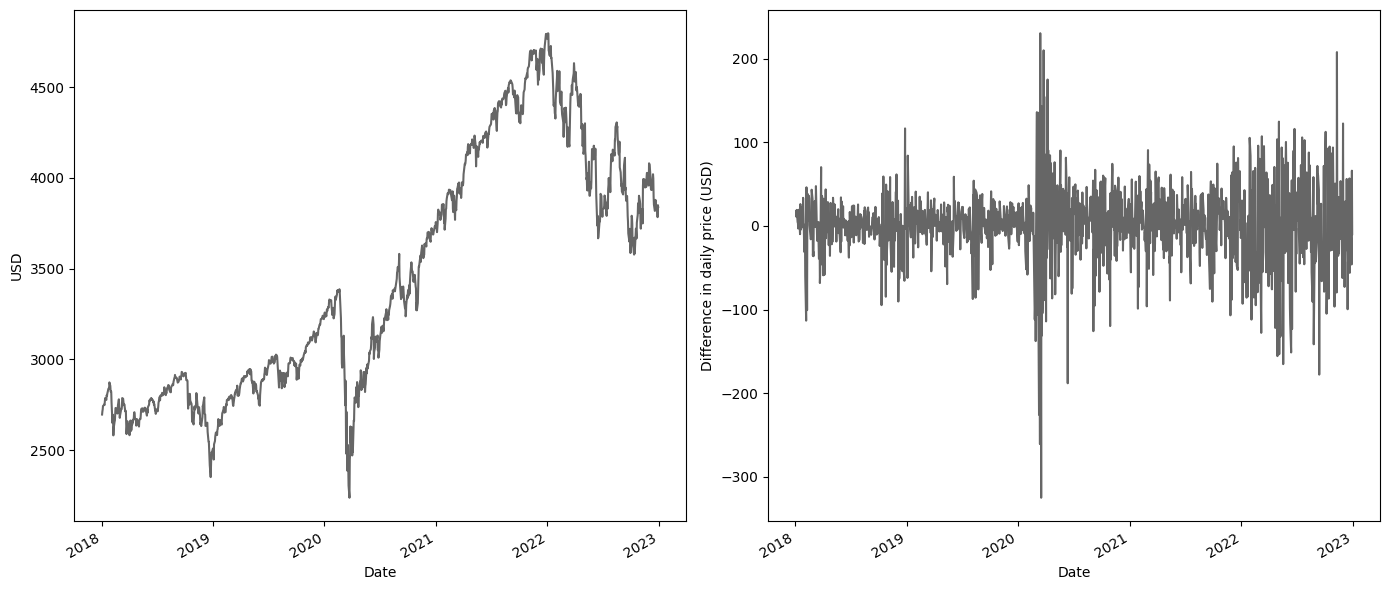

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

df.plot(ax=axes[0], alpha=0.6, color="#000000", ylabel="USD")

diff = df.diff()
diff.dropna(inplace=True)
diff.plot(ax=axes[1], alpha=0.6, color="#000000", ylabel="Difference in daily price (USD)")

plt.tight_layout()
plt.show()

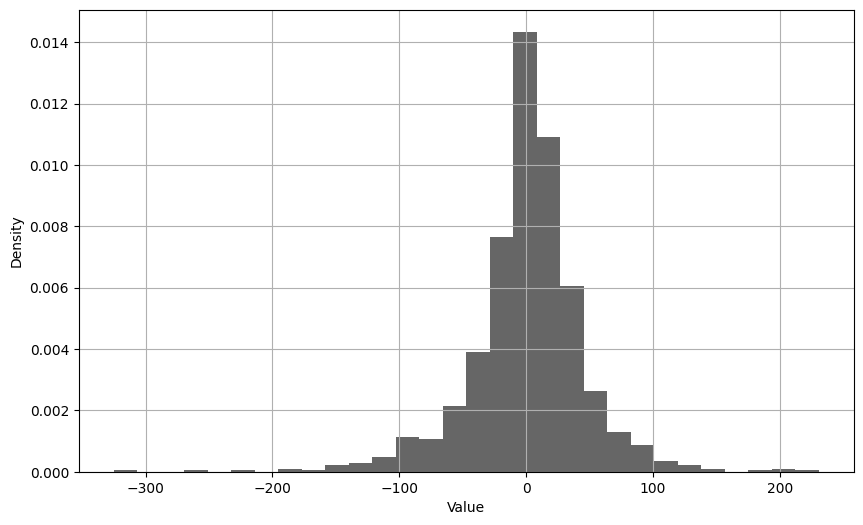

In [23]:
fit.plot_histogram(diff, bins=30)


Normal: AIC = 13147.765482869088, BIC = 13158.04003974361, params = {'mu': np.float64(0.9091334987331081), 'std': np.float64(44.931252451057254)}
Student's T: AIC = 12863.223159021083, BIC = 12878.634994332864, params = {'df': np.float64(2.6186127711274), 'loc': np.float64(3.088478789749762), 'scale': np.float64(26.647093620117587)}
GMM_2: AIC = 12877.260286024288, BIC = 12902.94667821059
[[  4.4271788 ]
 [-12.09579519]] 
 [[[ 728.66957243]]

 [[6573.1428798 ]]] 
 [0.78708159 0.21291841]

GMM_3: AIC = 12879.879388503927, BIC = 12920.97761600201
[[ 30.93950702]
 [-50.12344048]
 [  3.5350941 ]] 
 [[[2939.52976754]]

 [[3797.40350144]]

 [[ 504.39204046]]] 
 [0.19236037 0.14718038 0.66045925]

GMM_4: AIC = 12896.623203071416, BIC = 12953.13326588128
[[ 15.45224325]
 [-56.05370423]
 [ -9.99615223]
 [ 54.79466931]] 
 [[[ 415.85723304]]

 [[3627.15336017]]

 [[ 448.78555625]]

 [[2607.35904096]]] 
 [0.3979113  0.13932563 0.35169673 0.11106634]


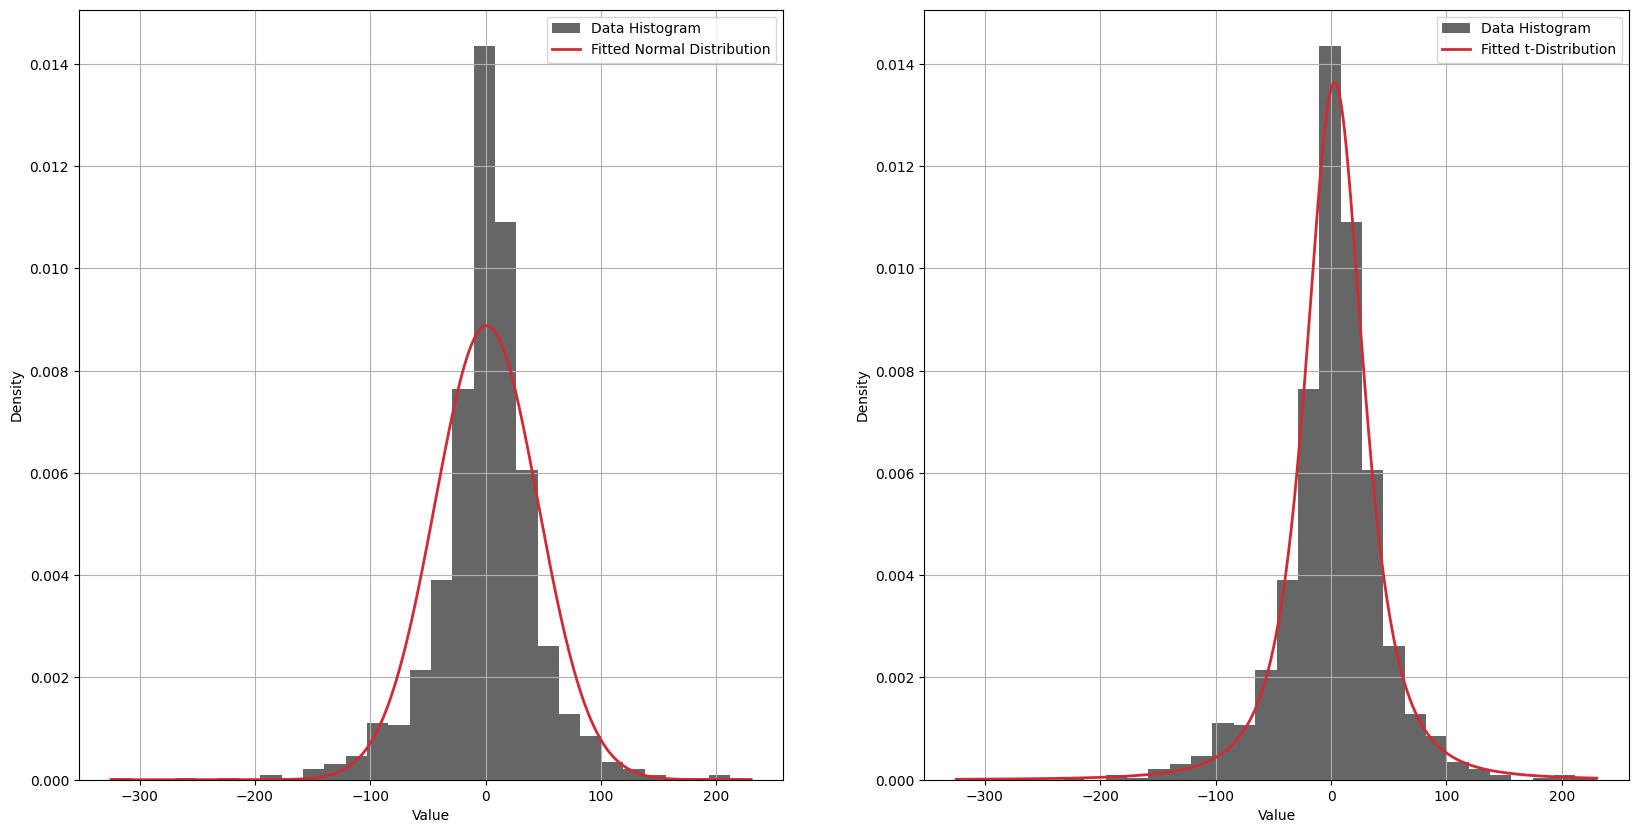

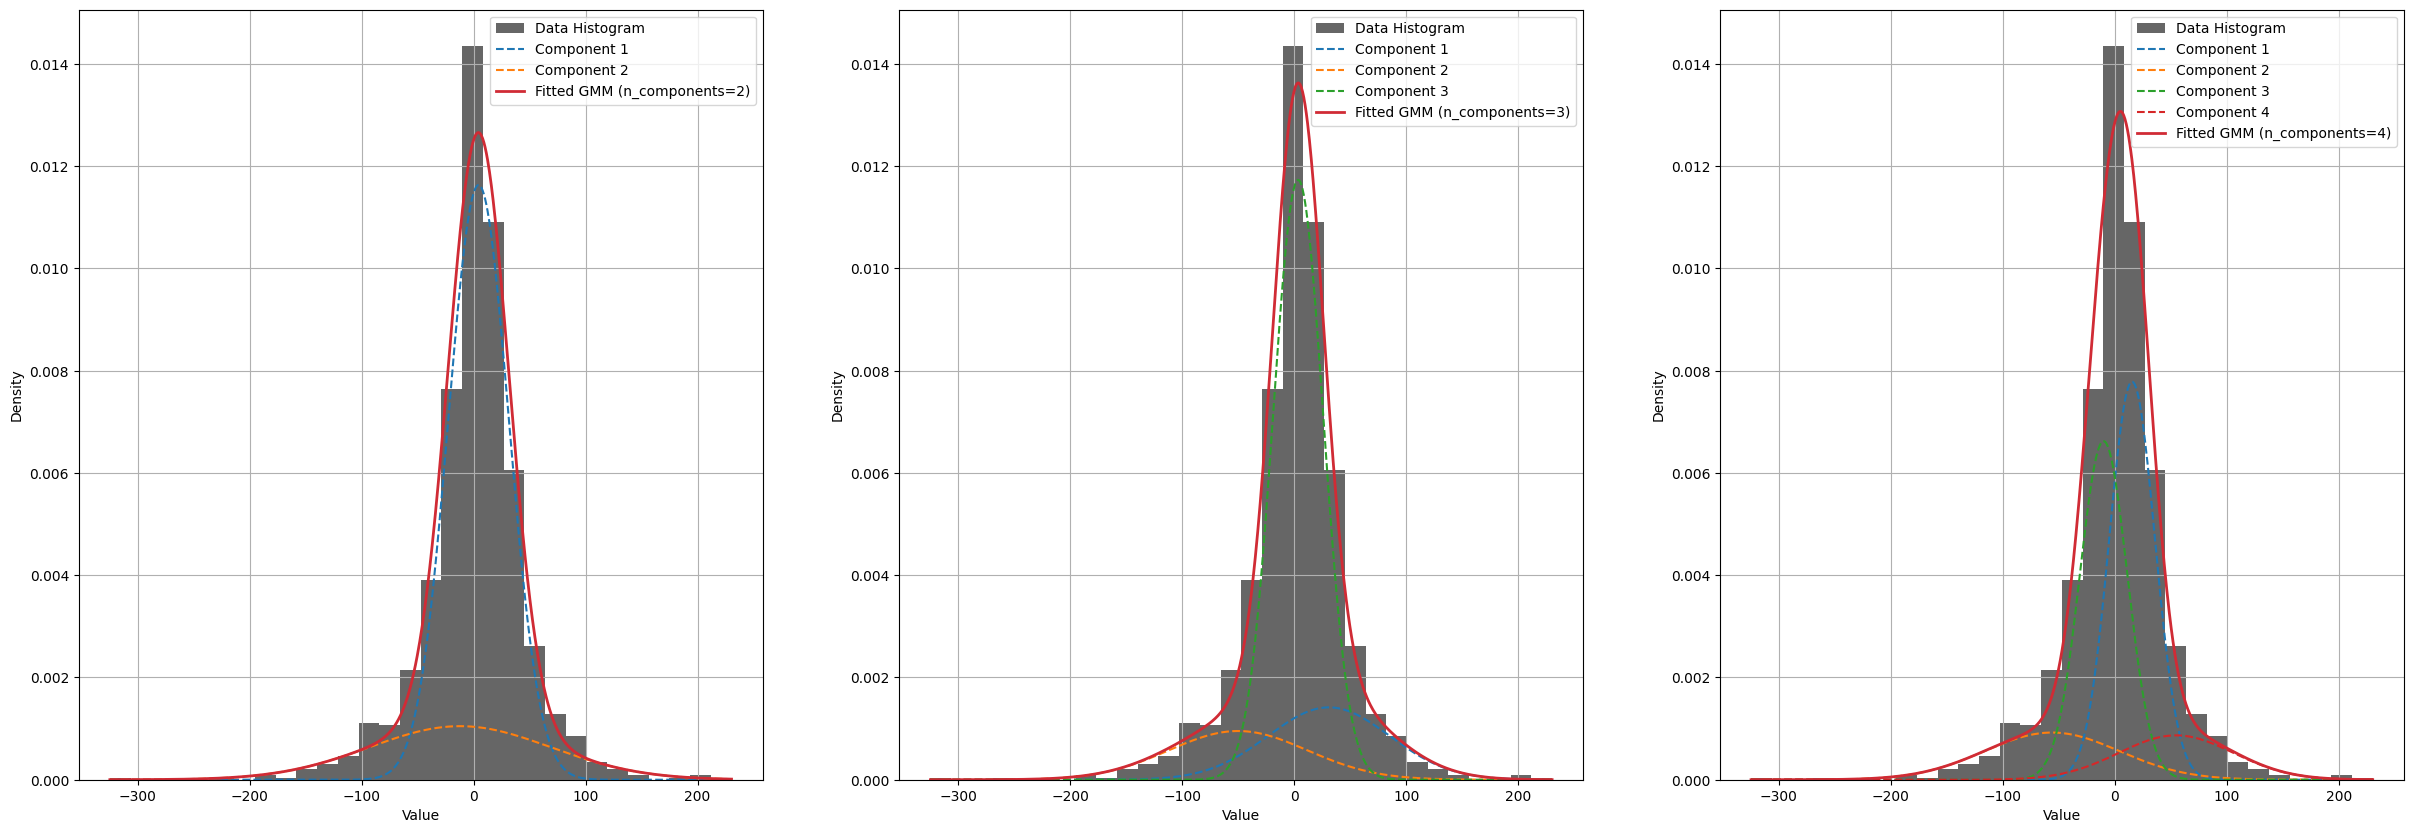

In [26]:
import matplotlib.pyplot as plt

data = diff.values


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

AIC_norm, BIC_norm, params = fit.fit_norm(data)
fit.plot_norm(data, **params , ax=axes[0])

AIC_t, BIC_t, params_t = fit.fit_t(data)
fit.plot_t(data, **params_t, ax=axes[1])

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

AIC_gmm2, BIC_gmm2, gmm2 = fit.fit_gmm(data, n_components=2)
fit.plot_gmm(data, gmm2, n_components=2, ax=axes[0])

AIC_gmm3, BIC_gmm3, gmm3 = fit.fit_gmm(data, n_components=3)
fit.plot_gmm(data, gmm3, n_components=3, ax=axes[1])

AIC_gmm4, BIC_gmm4, gmm4 = fit.fit_gmm(data, n_components=4)
fit.plot_gmm(data, gmm4, n_components=4, ax=axes[2])

print(f"Normal: AIC = {AIC_norm}, BIC = {BIC_norm}, params = {params}")
print(f"Student's T: AIC = {AIC_t}, BIC = {BIC_t}, params = {params_t}")
print(f"GMM_2: AIC = {AIC_gmm2}, BIC = {BIC_gmm2}")
print(gmm2.means_,"\n",gmm2.covariances_,"\n",gmm2.weights_)
print()
print(f"GMM_3: AIC = {AIC_gmm3}, BIC = {BIC_gmm3}")
print(gmm3.means_ ,"\n",gmm3.covariances_,"\n",gmm3.weights_)
print()
print(f"GMM_4: AIC = {AIC_gmm4}, BIC = {BIC_gmm4}")
print(gmm4.means_ ,"\n",gmm4.covariances_,"\n",gmm4.weights_)

